In [1]:
import numpy as np
import json
import glob
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
from collections import defaultdict
import tqdm 
from Bio.PDB import PDBParser
import warnings
import pickle
import dfs_code
from graphein.protein.resi_atoms import RESI_THREE_TO_1, AMINO_ACIDS
import sys
warnings.filterwarnings('ignore')

To use the Graphein submodule graphein.protein.features.sequence.embeddings, you need to install biovec.

To do so, use the following command:

    pip install biovec
To use the Graphein submodule graphein.protein.visualisation, you need to install pytorch3d.

pytorch3d cannot be installed via pip
To use the Graphein submodule graphein.protein.meshes, you need to install pytorch3d.

pytorch3d cannot be installed via pip


In [2]:
bond2bit = {"peptide_bond":0, "hydrophobic":1, "disulfide": 2, "hbond": 3, "ionic": 4, "aromatic": 5, 
            "aromatic_sulphur": 6, "cation_pi" : 7, "distance_threshold": 8}

In [3]:
path = "/mnt/ssd/datasets/enzyme/"
graphname = "graphein_basic"
node_limit = 1000000# np.inf
edge_limit = 5000000

In [4]:
with open(path+"metadata/function_labels.json", "r") as f:
    labels = json.load(f)

In [5]:
with open(path+"metadata/base_split.json", "r") as f:
    split = json.load(f)

In [6]:
with open(path+"%s.pkl"%graphname, "rb") as f:
    features = pickle.load(f)

In [7]:
nodes = []
edges = []
edge_types = set()
for prot, feats in tqdm.tqdm(features.items()):
    nodes += [len(feats['node_types'])]
    edges += [len(feats['edge_types'])]
    edge_types |= set(feats['edge_types'].tolist())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37427/37427 [00:00<00:00, 97814.67it/s]


In [8]:
etype_old2new = {etype:idx for idx, etype in enumerate(list(edge_types))}

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 norm

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Lao UI' (NotoLoopedLaoUI-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Myanmar' (NotoSansMyanmar-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cantarell' (Cantarell-Light.otf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExtraCondensedBold.ttf) normal normal 700 condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gurmukhi' (NotoSansGurmukhi-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Droid Sans Japanese' (DroidSansJapanese.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Kannada UI' (NotoSansKannadaUI-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ligconsolata' (Ligconsolata-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Kufi Arabic' (NotoKufiArabic-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Tamil Slanted' (NotoSerifTamilSlanted-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Sora Sompeng' (NotoSansSoraSompeng-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif' (NotoSerif-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Not

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Tibetan' (NotoSerifTibetan-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AkrutiTml1' (akruti1.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer UI' (NotoSansKhmerUI-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Telugu UI' (NotoSansTeluguUI-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tagbanwa' (NotoSansTagbanwa-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Rashi Hebrew' (NotoRashiHebrew-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Canadian Aboriginal' (NotoSansCanadianAboriginal-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Elymaic' (NotoSansElymaic-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Hmong Nyiakeng' (NotoSerifNyiakengPuachueHmong-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Droid Sans Tamil' (DroidSansTamil-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gurmukhi UI' (NotoSansGurmukhiUI-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Old Italic' (NotoSansOldItalic-Regular.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExtraExpandedBlack.ttf) normal normal 900 expanded>) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Soyombo' (NotoSansSoyombo-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matp

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif' (NotoSerif-ThinItalic.ttf) italic normal 100 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Georgian' (NotoSansGeorgian-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Samaritan' (NotoSansSamaritan-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Telugu' (NotoSerifTelugu-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Oriya' (NotoSansOriya-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'TSCu_Times' (TSCu_Times.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Limbu' (NotoSansLimbu-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tifinagh Rhis

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Thai UI' (NotoLoopedThaiUI-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Zanabazar Square' (NotoSansZanabazarSquare-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hebrew' (NotoSansHebrew-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Thai' (NotoLoopedThai-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Rashi Hebrew' (NotoRashiHebrew-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Bold.ttf) normal normal 700 condensed>) = 10.535
DEBUG:matplotlib.font_manager:f

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Old Hungarian' (NotoSansOldHungarian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'C059' (C059-BdIta.otf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Sinhala' (NotoSerifSinhala-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif' (NotoSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Thai UI' (NotoSansThaiUI-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Kannada' (NotoSansKannada-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bitstream Vera Sans' (Vera.ttf) normal normal 400 normal>) = 0.9590909090909092
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Armenian' 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Malayalam' (NotoSerifMalayalam-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Siddham' (NotoSansSiddham-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Oriya' (NotoSansOriya-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cherokee' (NotoSansCherokee-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer UI' (NotoSansKhmerUI-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Bengali UI' (NotoSansBengaliUI-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:fin

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExtraCondensedBlack.ttf) normal normal 900 condensed>) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hatran' (NotoSansHatran-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Thai UI' (NotoLoopedThaiUI-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Mono' (NotoSansMono-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Droid Serif' (DroidSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Kannada' (NotoSerifKannada-

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Display' (NotoSerifDisplay-LightItalic.ttf) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Balinese' (NotoSerifBalinese-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tifinagh Ahaggar' (NotoSansTifinaghAhaggar-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExtraCondensedExtraBold.ttf) normal normal 800 condensed>) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Myanmar UI' (NotoSansMyanmarUI-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Pro' (SourceCodePro-Regular.otf) normal normal 400 normal>) 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'padmaa' (padmaa-Medium-0.5.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExpandedLight.ttf) normal normal 300 expanded>) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Telugu' (NotoSerifTelugu-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Thai' (NotoLoopedThai-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cherokee' (NotoSansCherokee-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tamil' (NotoSansTamil-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Tibetan' (NotoSerifTibetan-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Georgian' (NotoSansGeorgian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Music' (NotoMusic-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Anatolian Hieroglyphs' (NotoSansAnatolianHieroglyphs-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Modi' (NotoSansModi-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer' (NotoSansKhmer-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Rashi Hebrew' (NotoRashiHebrew-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:find

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Sinhala' (NotoSerifSinhala-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tamil' (NotoSansTamil-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tamil UI' (NotoSansTamilUI-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Sinhala UI' (NotoSansSinhalaUI-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Variable' (SourceCodeVariable-Roman.otf) normal normal 200 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Thai' (NotoLoopedThai-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Tibetan' (NotoSerifTibetan-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont:

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gurmukhi UI' (NotoSansGurmukhiUI-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bitstream Vera Sans' (VeraIt.ttf) oblique normal 400 normal>) = 1.9590909090909092
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Georgian' (NotoSansGeorgian-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Ethiopic' (NotoSansEthiopic-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Devanagari' (NotoSerifDevanagari-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar-Light.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:find

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer' (NotoSansKhmer-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'TSCu_Paranar' (TSCu_paranarb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Mono' (NotoSansMono-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Thai UI' (NotoLoopedThaiUI-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Sinhala UI' (NotoSansSinhalaUI-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Avestan' (NotoSansAvestan-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Arabic' (NotoSansArab

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Bengali' (NotoSerifBengali-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bitstream Vera Serif' (VeraSeBd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gujarati UI' (NotoSansGujaratiUI-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-UltraExpandedMedium.ttf) normal normal 500 expanded>) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Thai UI' (NotoSansThaiUI-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-UltraExpanded.ttf) normal normal 400 expanded>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti N

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gurmukhi' (NotoSansGurmukhi-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MalOtf' (MalOtf.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Armenian' (NotoSerifArmenian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Khmer' (NotoSerifKhmer-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal 700 condensed>) = 1.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lao'

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExtraExpandedExtraLight.ttf) normal normal 275 expanded>) = 10.368749999999999
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Telugu' (NotoSansTelugu-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Pro' (SourceCodePro-It.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-SemiExpandedBold.ttf) normal normal 700 expanded>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font '

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Ethiopic' (NotoSerifEthiopic-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Myanmar' (NotoSansMyanmar-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lydian' (NotoSansLydian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Telugu UI' (NotoSansTeluguUI-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExtraLight.ttf) normal normal 275 normal>) = 10.16875
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tai Viet' (NotoSansTaiViet-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tifinagh Air' (NotoSansTifinaghAir-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Likhan' (LikhanNormal.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Hebrew' (NotoSerifHebrew-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tai Tham' (NotoSansTaiTham-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Old Permic' (NotoSansOldPermic-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Sinhala' (NotoSerifSinhala-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bitstream Vera Sans' (VeraBI.ttf) oblique normal 700 normal>) = 2.244090909090909
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'TSCu_Paranar' (TSCu_paranari.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-SemiCondensedSemiBold.ttf) normal normal 600 condensed>) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer' (NotoSansKhmer-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Ser

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tifinagh' (NotoSansTifinagh-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Bengali' (NotoSerifBengali-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tai Le' (NotoSansTaiLe-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tifinagh Tawellemmet' (NotoSansTifinaghTawellemmet-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Code Pro' (SourceCodePro-ExtraLight.otf) normal normal 200 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Telugu' (NotoSerifTelugu-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Thai' (NotoSerifThai-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_ma

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Arabic' (NotoSansArabic-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Gurmukhi' (NotoSerifGurmukhi-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AkrutiMal1' (mal1-n.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Malayalam' (NotoSerifMalayalam-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Droid Arabic Kufi' (DroidKufi-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Arabic UI' (NotoSansArabicUI-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Hebrew' 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Myanmar UI' (NotoSansMyanmarUI-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Georgian' (NotoSerifGeorgian-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Georgian' (NotoSansGeorgian-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExtraExpandedBold.ttf) normal normal 700 expanded>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Devanagari' (NotoSansDevanagari-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Malayalam' (NotoSerifMalayalam-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Ahom' (NotoSerifAhom-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_mana

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-ExpandedExtraBold.ttf) normal normal 800 expanded>) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer UI' (NotoSansKhmerUI-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Naskh Arabic' (NotoNaskhArabic-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Inconsolata' (Inconsolata-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Bengali' (NotoSerifBengali-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans' (NotoSans-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Carian' (NotoS

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliqUrdu-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Sinhala' (NotoSansSinhala-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gargi-1.2b' (Gargi-1.2b.ttf) italic normal 500 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gujarati' (NotoSansGujarati-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Ol Chiki' (NotoSansOlChiki-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Ugarit

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Kufi Arabic' (NotoKufiArabic-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Light.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Arabic' (NotoSansArabic-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Display' (NotoSerifDisplay-BlackItalic.ttf) italic normal 900 normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Droid Sans Fallback' (DroidSansFallbackLegacy.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Devanagari' (NotoSerifDevanagari-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans' (NotoSans-Thin.ttf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: scor

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Thai UI' (NotoLoopedThaiUI-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Bengali' (NotoSerifBengali-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Myanmar' (NotoSansMyanmar-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Thai UI' (NotoSansThaiUI-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hebrew' (NotoSansHebrew-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Looped Lao UI' (NotoLoopedLaoUI-Black.ttf) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AkrutiTml2' (akruti2.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif T

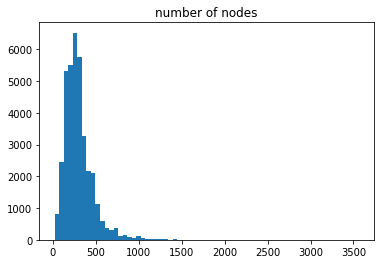

In [9]:
plt.hist(nodes, bins='rice')
plt.title('number of nodes')
plt.show()

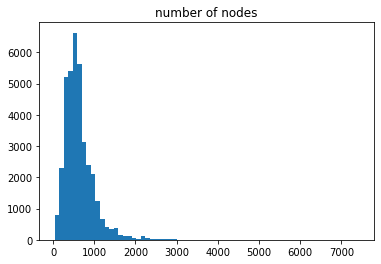

In [10]:
plt.hist(edges, bins='rice')
plt.title('number of nodes')
plt.show()

In [11]:
graphs = defaultdict(dict)
exception_list = []
for name, data in tqdm.tqdm(features.items()):
    edge_index = data['edge_index']
    node_types = data['node_types']
    assert len(data['edge_types']) == edge_index.shape[1] 
    edge_types = np.asarray([etype_old2new[etype] for etype in data['edge_types']])
    glue_edges = []
    edge_index_set = set((e[0], e[1]) for e in edge_index.T)
    assert len(list(edge_index_set)) == edge_index.shape[1]
    """for i in range(len(node_types)-1):
        if (i, i+1) not in edge_index_set:
            glue_edges += [[i, i+1]]
            edge_index_set.add((i, i+1))
        if (i+1, i) not in edge_index_set:
            glue_edges += [[i+1, i]]
            edge_index_set.add((i+1, i))
    if len(glue_edges) > 0:
        edge_types = np.concatenate((edge_types, np.ones(len(glue_edges), dtype=np.int32)))
        glue_edges = np.asarray(glue_edges).T
        edge_index = np.concatenate((edge_index, glue_edges), axis=1)
    """
    assert len(edge_types) == edge_index.shape[1] 
    assert len(list(edge_index_set)) == edge_index.shape[1]
    if len(node_types) > node_limit:
        continue
    if len(edge_types) > edge_limit:
        continue

    #min_dfs_code, min_dfs_index = dfs_code.min_dfs_code_from_edgeindex(edge_index, 
    #                                                                   node_types.tolist(), 
    #                                                                   edge_types.tolist())

    data['edge_types'] = edge_types
    #data['min_dfs_code'] = min_dfs_code
    #data['min_dfs_index'] = min_dfs_index
    graphs[name] = data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37427/37427 [00:19<00:00, 1883.82it/s]


In [12]:
trainset = set(split['train'])
validset = set(split['valid'])
testset = set(split['test'])

In [13]:
for key in graphs.keys():
    graphs[key]['label'] = labels[key]
    if key in trainset:
        graphs[key]['split'] = "train"
    elif key in validset:
        graphs[key]['split'] = "valid"
    elif key in testset:
        graphs[key]['split'] = "test"
    else:
        raise ValueError("unexpected")

In [14]:
with open(path+"%s_nodfs.pkl"%(graphname), "wb") as f:
    pickle.dump(graphs, f)

In [15]:
len(graphs)

37427